In [5]:

import Paths.Paths as paths

from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from regions import Regions, PixCoord
from astropy import stats
from itertools import chain
import dendrocat
Path = paths.filepaths()





         flux         
          Jy          
----------------------
 0.0005963662903209657
 0.0026440620005349354
 0.0005577890716877411
0.00023840883978100234
 0.0019435113065557038
 0.0003762253220152066
 0.0003036063956846969
 0.0017812479218619608
  0.003461594541169176
  0.002814920473728955
                   ...
 0.0004421798998423349
 0.0006349274352188816
  0.000537346987103495
 0.0007858085183115842
  0.000864481278317195
 0.0004779191055989399
 0.0002319849080678789
  0.039632447048113736
 0.0006135889741456268
 0.0009157426573106357
Length = 137 rows
137 137
group
-----
  0.0
  0.0
  0.0
  1.0
  0.0
  1.0
  1.0
  2.0
  0.0
  0.0
  ...
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
Length = 137 rows
       temp       
------------------
19.481005906134477
                --
                --
 28.94560690297382
 64.19536951475153
14.118435031295672
 7.276462397729649
                --
 61.58296595786414
                --
               ...
             

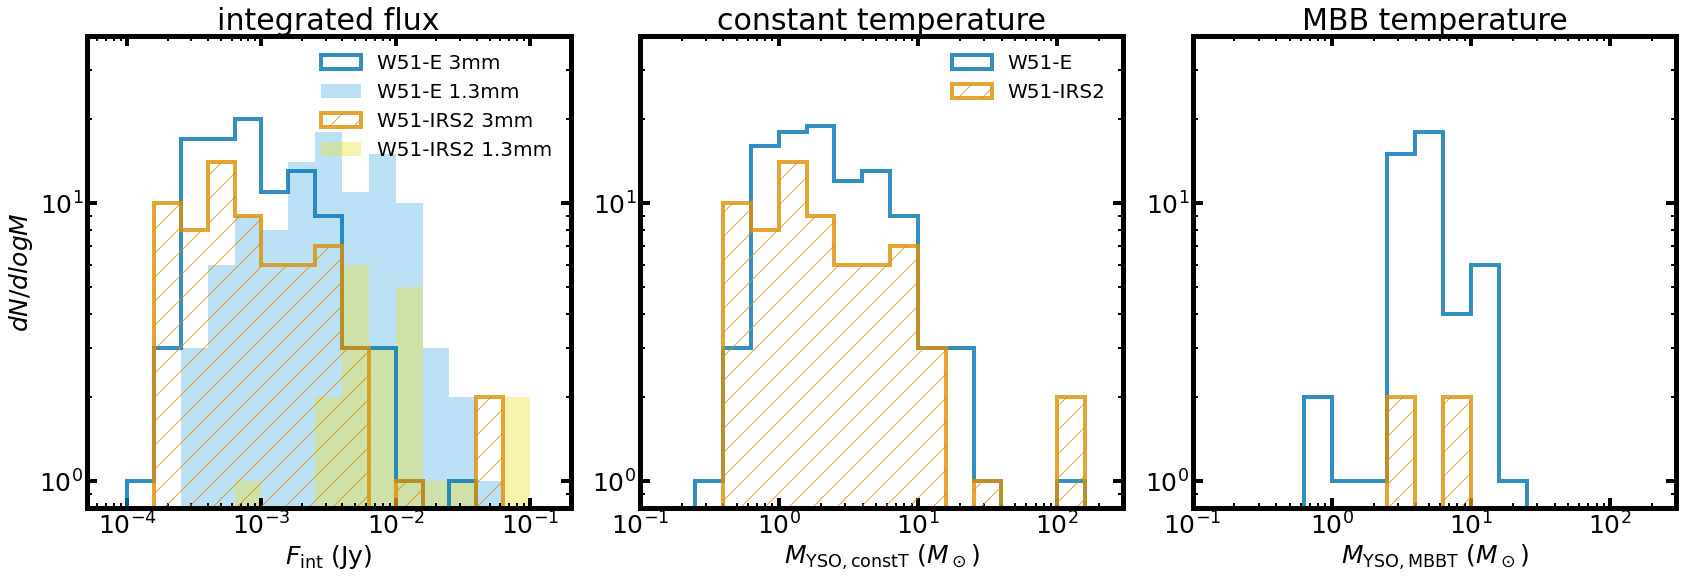

In [6]:



from astropy.table import Table
import matplotlib as mpl
import astropy.units as u
import astropy.constants as c
import seaborn as sns
plt.rcParams['axes.labelsize']=25
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.rcParams['axes.titlesize']=25
mpl.rcParams['axes.linewidth'] = 5
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 4
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['ytick.minor.width'] = 2
params = {"xtick.top": True, "ytick.right": True, "xtick.direction": "in", "ytick.direction": "in"}
plt.rcParams.update(params)
fig = plt.figure(figsize=(24,8))
ax1 = fig.add_axes([0.05,0.13,0.28,0.82])
ax2 = fig.add_axes([0.37,0.13,0.28,0.82])
ax3 = fig.add_axes([0.69,0.13,0.28,0.82])
ax1.set_title('integrated flux', fontsize=30)
ax2.set_title('constant temperature', fontsize=30)
ax3.set_title('MBB temperature', fontsize=30)

w51e_b3_flux_fits = Table.read(Path.w51e_b3_flux)
w51e_b6_flux_fits = Table.read(Path.w51e_b6_flux)
w51n_b3_flux_fits = Table.read(Path.w51n_b3_flux)
w51n_b6_flux_fits = Table.read(Path.w51n_b6_flux)
w51e_b3_int_flux = w51e_b3_flux_fits['flux']
w51e_b6_int_flux = w51e_b6_flux_fits['flux']
w51n_b3_int_flux = w51n_b3_flux_fits['flux']
w51n_b6_int_flux = w51n_b6_flux_fits['flux']
w51e_b3_int_flux_err = w51e_b3_flux_fits['flux_err']
w51e_b6_int_flux_err = w51e_b6_flux_fits['flux_err']
w51n_b3_int_flux_err = w51n_b3_flux_fits['flux_err']
w51n_b6_int_flux_err = w51n_b6_flux_fits['flux_err']


bins = np.logspace(-4,0,21)


w51ecat = Table.read(Path.w51e_dendro_matched_catalog)
w51ncat = Table.read(Path.w51n_dendro_matched_catalog)
temp_w51e = w51ecat['temp']
temp_w51n = w51ncat['temp']
group_w51e = w51ecat['group']
group_w51n = w51ncat['group']
ind_constT_w51e = np.where(group_w51e<2)[0]
ind_constT_w51n = np.where(group_w51n<2)[0]
cmap = sns.color_palette("colorblind")

ax1.hist(w51e_b3_int_flux[ind_constT_w51e], bins=bins, facecolor='none',edgecolor=cmap[0], histtype='step',label='W51-E 3mm',lw=4,alpha=0.8)
ax1.hist(w51e_b6_int_flux[ind_constT_w51e], bins=bins, color=cmap[-1],label='W51-E 1.3mm',lw=4,alpha=0.4)
ax1.hist(w51n_b3_int_flux[ind_constT_w51n], bins=bins, facecolor='none',edgecolor=cmap[1], histtype='step',label='W51-IRS2 3mm',lw=4,alpha=0.8,hatch='/')
ax1.hist(w51n_b6_int_flux[ind_constT_w51n], bins=bins, color=cmap[-2],label='W51-IRS2 1.3mm',lw=4,alpha=0.4)
ax1.set_xlabel(r'$F_{\rm int}$ (Jy)')
ax1.set_ylabel('$dN/dlogM$')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-5,1e-1)
ax1.set_xticks([1e-4,1e-3,1e-2,1e-1,1e0])
ax1.legend(fontsize=20,frameon=False,loc='upper right')
def kappa(nu, nu0=271.1*u.GHz, kappa0=0.0114*u.cm**2*u.g**-1, beta=1.75):
    """
    Compute the opacity $\kappa$ given a reference frequency (or wavelength)
    and a power law governing the opacity as a fuction of frequency:
    $$ \kappa = \kappa_0 \left(\\frac{\\nu}{\\nu_0}\\right)^{\\beta} $$
    The default kappa=0.0114 at 271.1 GHz comes from extrapolating the
    Ossenkopf & Henning 1994 opacities for the thin-ice-mantle, 10^6 year model
    anchored at 1.0 mm with an assumed beta of 1.75.
    Parameters
    ----------
    nu: astropy.Quantity [u.spectral() equivalent]
        The frequency at which to evaluate kappa
    nu0: astropy.Quantity [u.spectral() equivalent]
        The reference frequency at which $\kappa$ is defined
    kappa0: astropy.Quantity [cm^2/g]
        The dust opacity per gram of H2 along the line of sight.  Because of
        the H2 conversion, this factor implicitly includes a dust to gas ratio
        (usually assumed 100)
    beta: float
        The power-law index governing kappa as a function of nu
    """
    return (kappa0*(nu.to(u.GHz,u.spectral())/nu0.to(u.GHz,u.spectral()))**(beta)).to(u.cm**2/u.g)

def get_mass(flux, kappa, freq, temp=40*u.K, dist=5.4*u.kpc, verbose=False):
    BB = 2 *np.pi * c.h * freq**3 / (c.c**2) / (np.e**(c.h*freq/(c.k_B*temp)) - 1)
    mass = flux.to(u.Jy) * dist**2 / BB.to(u.Jy) / kappa
    
    return mass.to(u.Msun)

massbins = np.logspace(-3,3,31)
b3freq = 92982346121.91989*u.Hz
b6freq = 226691598706.70853*u.Hz
b3kappa = kappa(b3freq)
b6kappa = kappa(b6freq)
median_temp_w51e = np.ma.median(temp_w51e)

median_temp_w51n = np.ma.median(temp_w51n)
nanind_MBBT_w51e = np.where(~np.isfinite(temp_w51e))[0]
nanind_MBBT_w51n = np.where(~np.isfinite(temp_w51n))[0]



print(w51e_b3_int_flux)
w51e_b3_mass = get_mass(w51e_b3_int_flux, b3kappa,  b3freq, temp=40*u.K, verbose=True)
w51e_b3_mass_err = get_mass(w51e_b3_int_flux_err, b3kappa,  b3freq, temp=40*u.K)   

w51e_b6_mass = get_mass(w51e_b6_int_flux, b6kappa,  b6freq, temp=40*u.K)   
w51n_b3_mass = get_mass(w51n_b3_int_flux, b3kappa,  b3freq,temp=40*u.K)
w51n_b3_mass_err = get_mass(w51n_b3_int_flux_err, b3kappa,  b3freq, temp=40*u.K,)   
w51n_b6_mass = get_mass(w51n_b6_int_flux,  b6kappa, b6freq,temp=40*u.K)
"""
w51e_b3_mass[nanind_MBBT_w51e] = np.nan
w51e_b6_mass[nanind_MBBT_w51e] = np.nan
w51n_b3_mass[nanind_MBBT_w51n] = np.nan
w51n_b6_mass[nanind_MBBT_w51n] = np.nan
w51e_b3_mass_upperr[nanind_MBBT_w51e] = np.nan
w51n_b3_mass_upperr[nanind_MBBT_w51n] = np.nan
w51e_b3_mass_lowerr[nanind_MBBT_w51e] = np.nan
w51n_b3_mass_lowerr[nanind_MBBT_w51n] = np.nan
"""
print(len(w51e_b3_mass), len(group_w51e))
print(group_w51e)
ax2.hist(w51e_b3_mass.value[ind_constT_w51e], bins=massbins, facecolor='none',edgecolor=cmap[0], histtype='step',label='W51-E',lw=4,alpha=0.8)
#ax2.hist(w51e_b6_mass.value[ind_w51e], bins=massbins, color='cyan',label='W51-E B6',lw=4,alpha=0.4)
ax2.hist(w51n_b3_mass.value[ind_constT_w51n], bins=massbins, facecolor='none',edgecolor=cmap[1], histtype='step',label='W51-IRS2',lw=4,alpha=0.8,hatch='/')
#ax2.hist(w51n_b6_mass.value[ind_w51n], bins=massbins, color='peru',label='W51-IRS2 B6',lw=4,alpha=0.4)
#ax2.hist(np.append(w51n_b3_mass.value,w51e_b3_mass.value), bins=massbins, facecolor='none',edgecolor='k', histtype='step',label='total',lw=4,alpha=0.8,ls='dashed')
ax2.legend(fontsize=20,frameon=False)
w51e_b3_mass2 = get_mass(w51e_b3_int_flux, b3kappa,  b3freq,temp=temp_w51e*u.K)
w51e_b3_mass2_err = get_mass(w51e_b3_int_flux_err, b3kappa,  b3freq, temp=temp_w51e*u.K)   


w51e_b6_mass2 = get_mass(w51e_b6_int_flux, b6kappa,  b6freq,temp=temp_w51e*u.K)   
w51n_b3_mass2 = get_mass(w51n_b3_int_flux, b3kappa,  b3freq,dist=5.1*u.kpc,temp=temp_w51n*u.K)   
w51n_b3_mass2_err = get_mass(w51n_b3_int_flux_err, b3kappa,  b3freq,dist=5.1*u.kpc,temp=temp_w51n*u.K)   
w51n_b6_mass2 = get_mass(w51n_b6_int_flux,  b6kappa, b6freq,dist=5.1*u.kpc,temp=temp_w51n*u.K)

w51e_b3_mass2[nanind_MBBT_w51e] = np.nan
w51e_b6_mass2[nanind_MBBT_w51e] = np.nan
w51n_b3_mass2[nanind_MBBT_w51n] = np.nan
w51n_b6_mass2[nanind_MBBT_w51n] = np.nan
print(temp_w51e, temp_w51n)
ax3.hist(w51e_b3_mass2.value[ind_constT_w51e], bins=massbins, facecolor='none',edgecolor=cmap[0], histtype='step',label='W51-E',lw=4,alpha=0.8)
#ax3.hist(w51e_b6_mass2.value[ind_w51e], bins=massbins, color='cyan',label='W51-E B6',lw=4,alpha=0.4)
ax3.hist(w51n_b3_mass2.value[ind_constT_w51n], bins=massbins, facecolor='none',edgecolor=cmap[1], histtype='step',label='W51-IRS2',lw=4,alpha=0.8,hatch='/')
#ax3.hist(w51n_b6_mass2.value[ind_w51n], bins=massbins, color='peru',label='W51-IRS2 B6',lw=4,alpha=0.4)
#ax3.hist(np.append(w51n_b3_mass2.value,w51e_b3_mass2.value), bins=massbins, facecolor='none',edgecolor='k', histtype='step',label='total',lw=4,alpha=0.8,ls='dashed')
print(w51e_b3_mass2, w51n_b3_mass2)


ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$M_{\rm YSO, constT}$ ($M_\odot$)')
#ax2.set_ylabel('YSO number')
ax2.set_xticks([1e-2,1e-1,1e0,1e1,1e2])
#ax2.legend(fontsize=20,frameon=False)
ax1.set_ylim(0.8,40)
ax2.set_ylim(0.8,40)
ax3.set_ylim(0.8,40)
ax1.set_xlim(5e-5,2e-1)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel(r'$M_{\rm YSO, MBBT}$ ($M_\odot$)')
#ax3.set_ylabel('YSO number')
ax3.set_xticks([1e-2,1e-1,1e0,1e1,1e2])
ax2.set_xlim(1e-1,3e2)
ax3.set_xlim(1e-1,3e2)
#ax3.legend(fontsize=20,frameon=False)
plt.savefig('flux_mass.png')
idx = [33,40,41]
print(w51e_b3_mass2[idx])
print(w51e_b3_mass[idx])
idx = [10]
print(w51n_b3_mass[idx])


In [7]:
w51ecat['constT_mass'] = w51e_b3_mass
w51ncat['constT_mass'] = w51n_b3_mass
w51ecat['MBBT_mass'] = w51e_b3_mass2
w51ncat['MBBT_mass'] = w51n_b3_mass2
w51ecat['constT_mass_err'] = w51e_b3_mass_err
w51ncat['constT_mass_err'] = w51n_b3_mass_err
w51ecat['MBBT_mass_err'] = w51e_b3_mass2_err
w51ncat['MBBT_mass_err'] = w51n_b3_mass2_err

w51ecat.write(Path.w51e_dendro_matched_catalog, format='fits', overwrite=True)
w51ncat.write(Path.w51n_dendro_matched_catalog, format='fits', overwrite=True)





NameError: name 'w51e_dendro_matched_catalog' is not defined

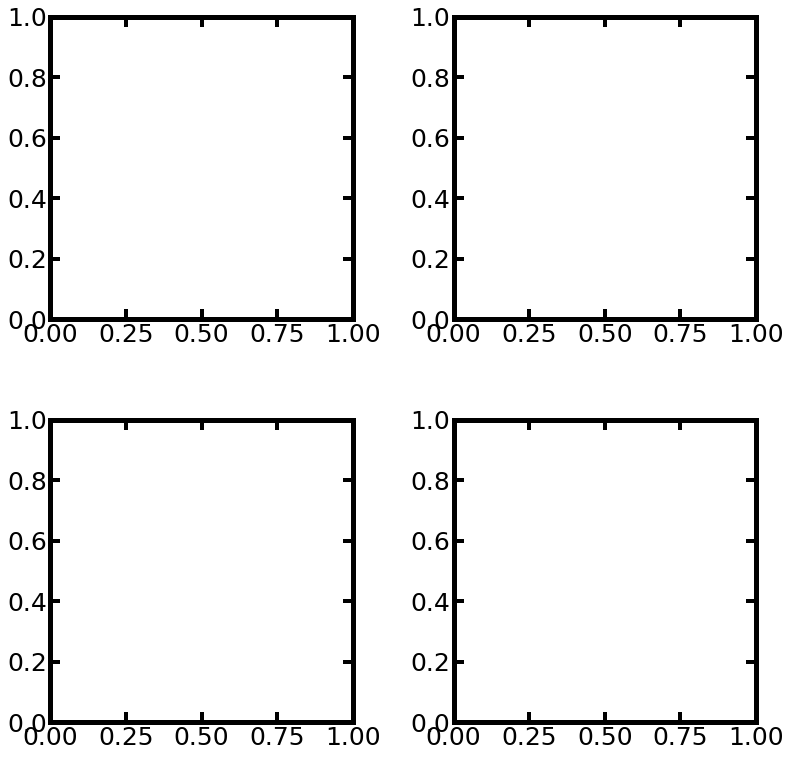

In [8]:
def get_radius(fitsfile, band='b6', index=None, dist_kpc = 5.41):
 
    fits = Table.read(fitsfile)
    major = fits['deconvolved_major_%s'%band]
    minor = fits['deconvolved_minor_%s'%band]
    if index is None:
        index = np.arange(len(major))
    
    avg_size = np.sqrt(major * minor)[index]
    radius_au = avg_size * np.pi/180 * dist_kpc *1000*206264.806 *2/2.355
    return radius_au

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_axes([0.1,0.1,0.3,0.3])
ax2 = fig.add_axes([0.5,0.1,0.3,0.3])
ax3 = fig.add_axes([0.1,0.5,0.3,0.3])
ax4 = fig.add_axes([0.5,0.5,0.3,0.3])

w51e_b6_rad = get_radius(w51e_dendro_matched_catalog)

w51e_b3_rad = get_radius(w51e_dendro_matched_catalog,band='b3')

w51n_b6_rad = get_radius(w51n_dendro_matched_catalog, dist_kpc=5.1)

w51n_b3_rad = get_radius(w51n_dendro_matched_catalog,  band='b3', dist_kpc=5.1)

ax1.scatter(w51e_b6_rad, w51e_b6_mass, c='b', s=10, label='B6')
ax1.scatter(w51e_b3_rad, w51e_b3_mass, c='orange', s=10, label='B3')
ax2.scatter(w51n_b6_rad, w51n_b6_mass, c='b', s=10, label='B6')
ax2.scatter(w51n_b3_rad, w51n_b3_mass, c='orange', s=10, label='B3')
ax3.scatter(w51e_b6_rad, w51e_b6_mass2, c='b', s=10, label='B6')
ax3.scatter(w51e_b3_rad, w51e_b3_mass2, c='orange', s=10, label='B3')
ax4.scatter(w51n_b6_rad, w51n_b6_mass2, c='b', s=10, label='B6')
ax4.scatter(w51n_b3_rad, w51n_b3_mass2, c='orange', s=10, label='B3')

ax1.set_xlabel('rad (AU)')
ax2.set_xlabel('rad (AU)')
ax3.set_xlabel('rad (AU)')
ax4.set_xlabel('rad (AU)')

ax1.set_ylabel('mass using 50K (Msun)')
ax2.set_ylabel('mass using 50K (Msun)')
ax3.set_ylabel('mass from BB (Msun)')
ax4.set_ylabel('mass from BB (Msun)')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax1.set_xlim(0,600)
ax2.set_xlim(0,600)
ax3.set_xlim(0,600)
ax4.set_xlim(0,600)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')

ax1.set_ylim(1e-3,1e2)
ax2.set_ylim(1e-3,1e2)
ax3.set_ylim(1e-3,1e2)
ax4.set_ylim(1e-3,1e2)

ax1.set_title('W51-E')
ax2.set_title('W51-IRS2')
ax3.set_title('W51-E')
ax4.set_title('W51-IRS2')